# Yolo OBB

Test Oriented Bounding Boxes Object Detection
定向目标检测（Oriented Object Detection）比传统的目标检测更进一步，通过引入旋转角度信息来更精确地定位图像中的目标。

主要特点：

相比传统目标检测使用水平矩形框，定向目标检测输出旋转边界框（rotated bounding boxes）
每个检测结果包含：
- 旋转边界框的坐标
- 旋转角度（orientation angle）
- 类别标签（class label）
- 置信度分数（confidence score）


image 1/1 /home/shq/yolo/image/sv2_000017.jpg: 576x1024 10.4ms
Speed: 4.7ms preprocess, 10.4ms inference, 2.7ms postprocess per image at shape (1, 3, 576, 1024)


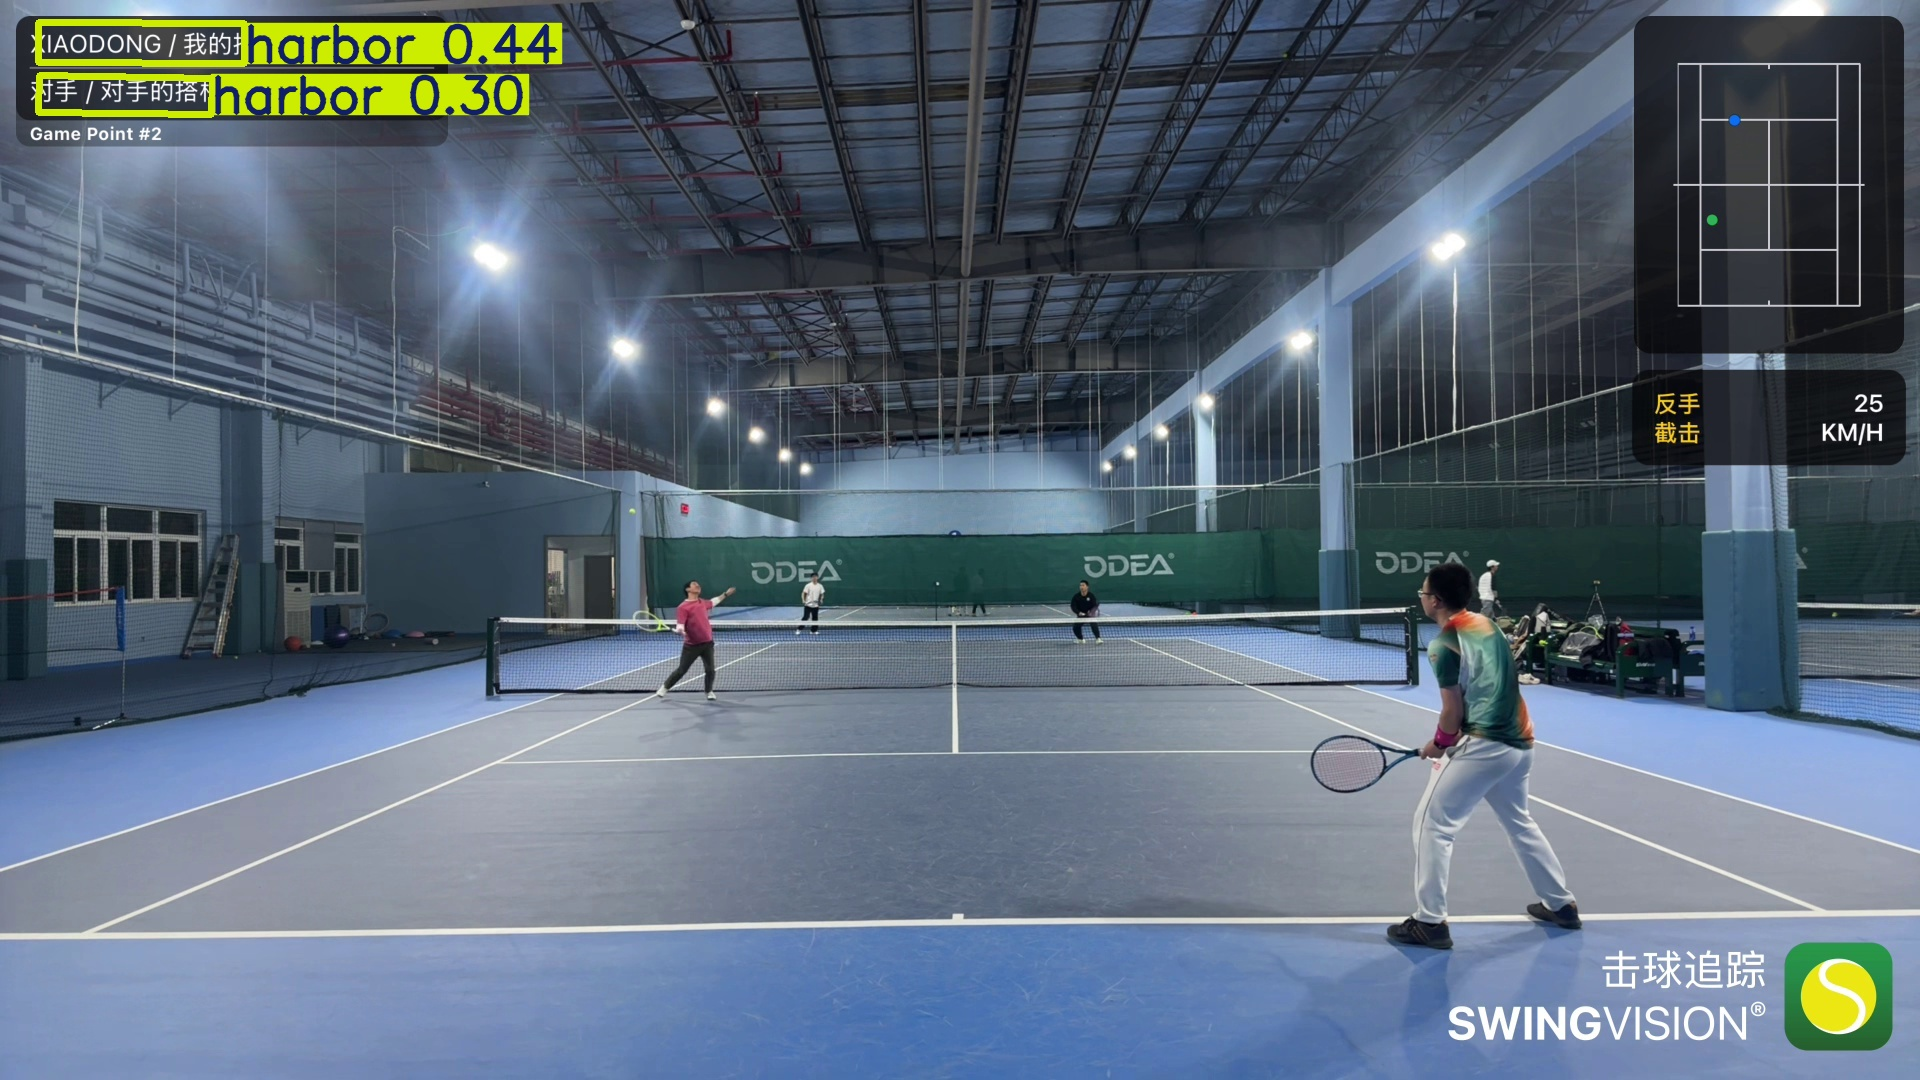

No detection results available


In [2]:
from ultralytics import YOLO
import cv2
import os
from IPython.display import Image, display

# Create predict directory if it doesn't exist
os.makedirs('predict', exist_ok=True)

# Load a model
model = YOLO("yolo11n-obb.pt")  # load an official model

# Predict with the model
results = model("image/sv2_000017.jpg")  # predict on an image

# Process and save results
for r in results:
    # Plot oriented bounding boxes
    im_array = r.plot()  # plot a BGR numpy array of predictions
    
    # Get original filename without path
    orig_filename = os.path.basename("image/sv2_000017.jpg")
    save_path = os.path.join('predict', f'obb_{orig_filename}')
    
    # Save the visualization
    cv2.imwrite(save_path, im_array)

    # Display result in Jupyter notebook
    display(Image(filename=save_path))

    # Print detection information (optional)
    if hasattr(r, 'boxes') and r.boxes is not None:
        num_objects = len(r.boxes)
        if num_objects > 0:
            print(f'Number of detected objects: {num_objects}')
            for box in r.boxes:
                print(f'Class: {model.names[int(box.cls)]}')
                print(f'Confidence: {float(box.conf):.2f}')
        else:
            print("No objects detected in the image")
    else:
        print("No detection results available")